<div style="padding:20px;color:white;margin:0;font-size:35px;font-family:arial;text-align:center;display:fill;border-radius:5px; letter-spacing: 2px; background-color:#257CCB;overflow:hidden"><b>INTEGRATED CONTINUOUS ASSESSMENT</b></div>

<a id="1.1"></a>
<h2 style="font-family:arial;text-align:center; font-size: 32px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: centre; letter-spacing: 5px; color:#257CCB; background-color: #ffffff;"> <b>DATA VISUALISATION + MACHINE LEARNING</b></h2>

Programme Title: HDIP Data Analytics

Cohort: HDIP Feb 22 FT/PT

Module Title(s): Data Visualization Techniques & Machine Learning for Business 

Assignment Type: Individual  

Assignment Title: Integrated CA2_DVT_MLB

Lecturer(s): David McQuaid & Dr. Muhammad Iqba

Issue Date: 19th October 2023  

Submission Deadline Date:  26th November 2023 

Student: **_Bárbara Abreu Costa 2023099_**

GitHub Repository: https://github.com/Babreucosta/Integrated-CA2_DVT_MLB

-----

<a id="1"></a>
# <p style="padding:10px;background-color:#257CCB;margin:0;color:white;font-family:arial;font-size:100%;text-align:center;border-radius:5px;overflow:hidden;font-weight:500">_MACHINE LEARNING_</p>

**QUESTION 1**

Discuss and explain the purpose of a recommendation system for online retail business in machine
learning. Briefly compare Content and Collaborative filtering using any dataset of your choice (Datasets used
in the class tutorials or exercises are not allowed to use in this CA2). Train and test machine learning models
for the user-user or item-item collaborative filtering. Justify your recommendations for the considered
scenario by providing a conceptual insight

> **_RECOMMENDATION SYSTEM PURPOSE_**
> 
> Recommendation systems play a pivotal role in the success of online retail businesses by leveraging machine learning algorithms to deliver personalized product suggestions to users. It analyze a user's historical behavior, preferences, and interactions with the platform to offer product suggestions tailored to their individual tastes and needs. This personalization creates a more engaging and relevant shopping experience. 
> 
> One of the primary purposes of a recommendation system is to augment the customer experience. By presenting relevant products to users based on their past interactions, the system assists in narrowing down choices from a vast array of offerings. This not only saves time for the customer but also creates a sense of personalization, fostering customer loyalty. For instance, Amazon's recommendation engine analyzes user behavior and provides suggestions such as "Customers who bought this also bought..." or "Recommended for you", contributing significantly to their sales revenue (Linden et al., 2003).
>
> Another vital purpose of recommendation systems is to facilitate cross-selling and up-selling opportunities. Cross-selling involves suggesting related or complementary products to the user's current selection, while up-selling involves recommending higher-value alternatives. 
>
> In conclusion, recommendation systems are indispensable tools for online retail businesses, leveraging machine learning techniques to enhance the customer experience, increase sales, alleviate information overload, and drive cross-selling and up-selling initiatives. Through personalized suggestions, these systems create a win-win situation, benefiting both the customer and the retailer.

---

<a id="1.1"></a>
<h2 style="font-family:arial;text-align:center; font-size: 32px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: centre; letter-spacing: 3px; color:#257CCB; background-color: #ffffff;"> <b>AMAZON SALES DATASET</b></h2>

This dataset is having the data of 1K+ Amazon Product's Ratings and Reviews as per their details listed on the official website of Amazon

##### DICTIONARY

| STT | ATTRIBUTE NAME | MEANING |
|:---| :--- |:--- |
| 0 | product_id | Product ID
| 1 |product_name | Name of the Product
| 2 |category | Category of the Product
| 3 |discounted_price | Discounted Price of the Product
| 4 |actual_price | Actual Price of the Product
| 5 |discount_percentage | Percentage of Discount for the Product
| 6 |rating | Rating of the Product
| 7 |rating_count | Number of people who voted for the Amazon rating
| 8 |about_product | Description about the Product
| 9 |user_id | ID of the user who wrote review for the Product
| 10 |user_name | Name of the user who wrote review for the Product
| 11 |review_id | ID of the user review
| 12 |review_title | Short review
| 13 |review_content | Long review
| 14 |img_link | Image Link of the Product
| 15 |product_link | Official Website Link of the Product

##### DATA UNDERSTANDING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('customer_shopping_data.csv')

In [5]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [6]:
df.shape

(99457, 10)

##### MISSING VALUES

In [9]:
def check_missing_values(dataframe):
    return dataframe.isnull().sum()

print(check_missing_values(df))

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64


##### DUPLICATE DATA

In [10]:
def check_duplicates(dataframe):
    return dataframe.duplicated().sum()

print(check_duplicates(df))

0


##### DATA TYPES

In [11]:
def check_data_types(dataframe):
    return dataframe.dtypes

print(check_data_types(df))

invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object


In [14]:
#Invoice date has wrong data type, we will fix it
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True)

#Also, we create new columns for year and month that can be useful for further analysis
df['year'] = df['invoice_date'].dt.strftime("%Y")
df['month'] = df['invoice_date'].dt.strftime("%m")

df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,08
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,05
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10


In [15]:
# Get descriptive information about dataset
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [16]:
# Add new column total money spent, which will be useful later
df['total'] = df['price'] * df['quantity']
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,08,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,05,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10,242.40


In [17]:
# New column with age group
age_groups = [18, 24, 34, 44, 54, 64, 70]
labels = ['18-24','25-34','35-44','45-54','55-64','65-70']
df['age_group'] = pd.cut(df['age'],bins=age_groups, labels =labels)
age_cats = pd.CategoricalDtype(['18-24','25-34','35-44','45-54','55-64','65-70'], ordered=True)
df['age_group'] = df['age_group'].astype(age_cats)
df.head()

#Seems like now our data has all necessary columns, correct datatypes, no duplicates or 
#missing entires. And ready for further analysis

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month,total,age_group
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,08,7502.00,25-34
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12,5401.53,18-24
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11,300.08,18-24
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,05,15004.25,65-70
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10,242.40,45-54


##### VISUALIZATION

Analyze the distribution of customer ratings using a histogram.

[Text(0.5, 1.0, 'Gender and number of transactions')]

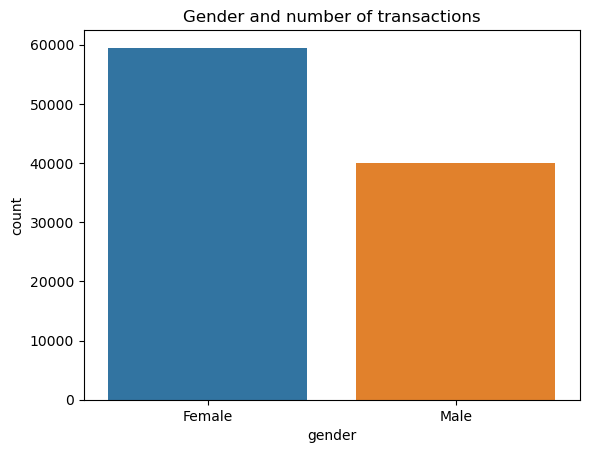

In [18]:
#First, investigate gender columns and see if we get some insights
sns.countplot(data=df,x='gender').set(title='Gender and number of transactions')

[Text(0.5, 1.0, 'Age distribution and number of transactions')]

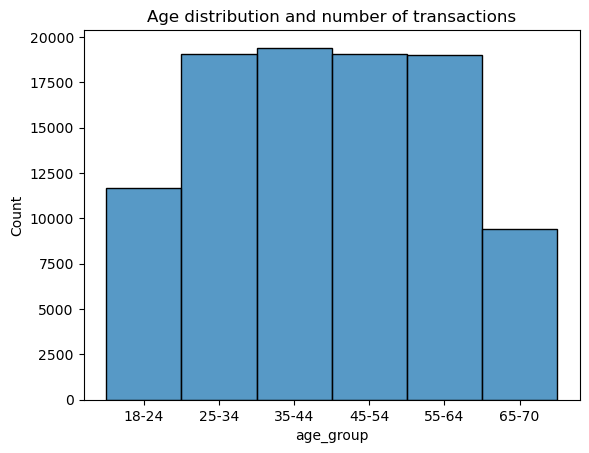

In [19]:
# Build histogram of age distribution per number of transactions
sns.histplot(data=df, x='age_group').set(title = 'Age distribution and number of transactions')

[Text(0.5, 1.0, 'Age group and total spent')]

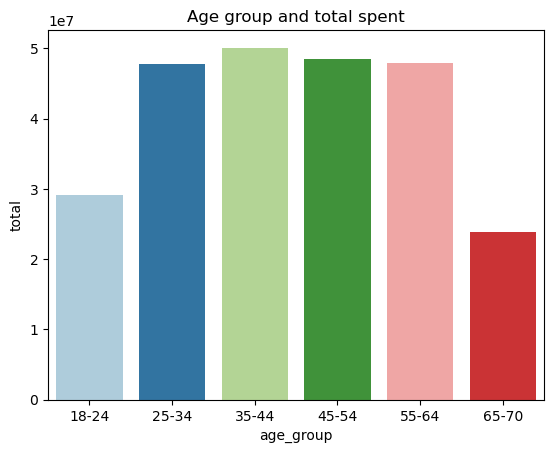

In [20]:
# Which age group spent more money?
age_group_total = df.groupby('age_group')['total'].sum().reset_index()
sns.barplot(data=age_group_total, x='age_group', y='total', palette = 'Paired').\
set(title='Age group and total spent')

[Text(0.5, 1.0, 'Payment method and number of transactions')]

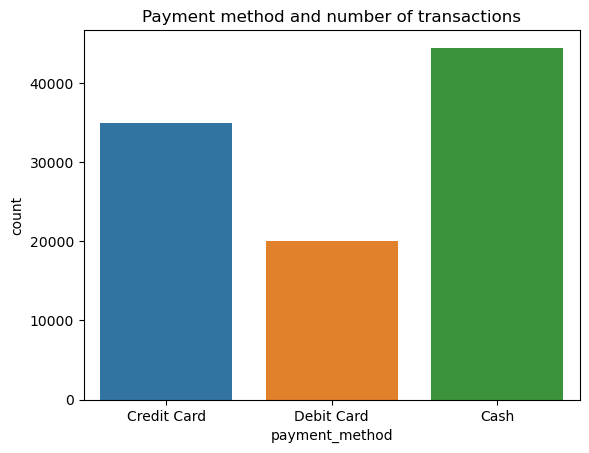

In [22]:
# Explore payment methods
sns.countplot(x='payment_method', data=df).set(title='Payment method and number of transactions')

In [23]:
# Most customers are paying by cash. But what about the amount of money spent and payment method?
df_payment = pd.DataFrame(df.groupby('payment_method')['total'].sum())
df_payment

,total
payment_method,
Cash,1.128322e+08
Credit Card,8.807712e+07
Debit Card,5.059643e+07


Text(0.5, 1.0, 'Price distribution')

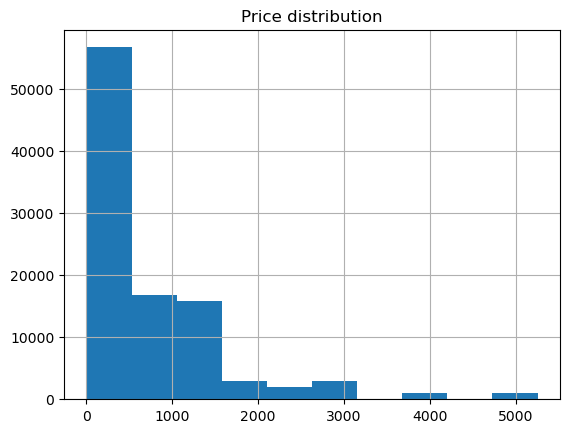

In [24]:
# Investigate which products price customers usually prefer
df.price.hist()
plt.title('Price distribution')

In [25]:
# Discover popular categories
df_category_count = df.groupby('category')['invoice_no'].count().reset_index()
df_category_count.sort_values(by='invoice_no', ascending=False)

,category,invoice_no
1,Clothing,34487
2,Cosmetics,15097
3,Food & Beverage,14776
7,Toys,10087
4,Shoes,10034
5,Souvenir,4999
6,Technology,4996
0,Books,4981


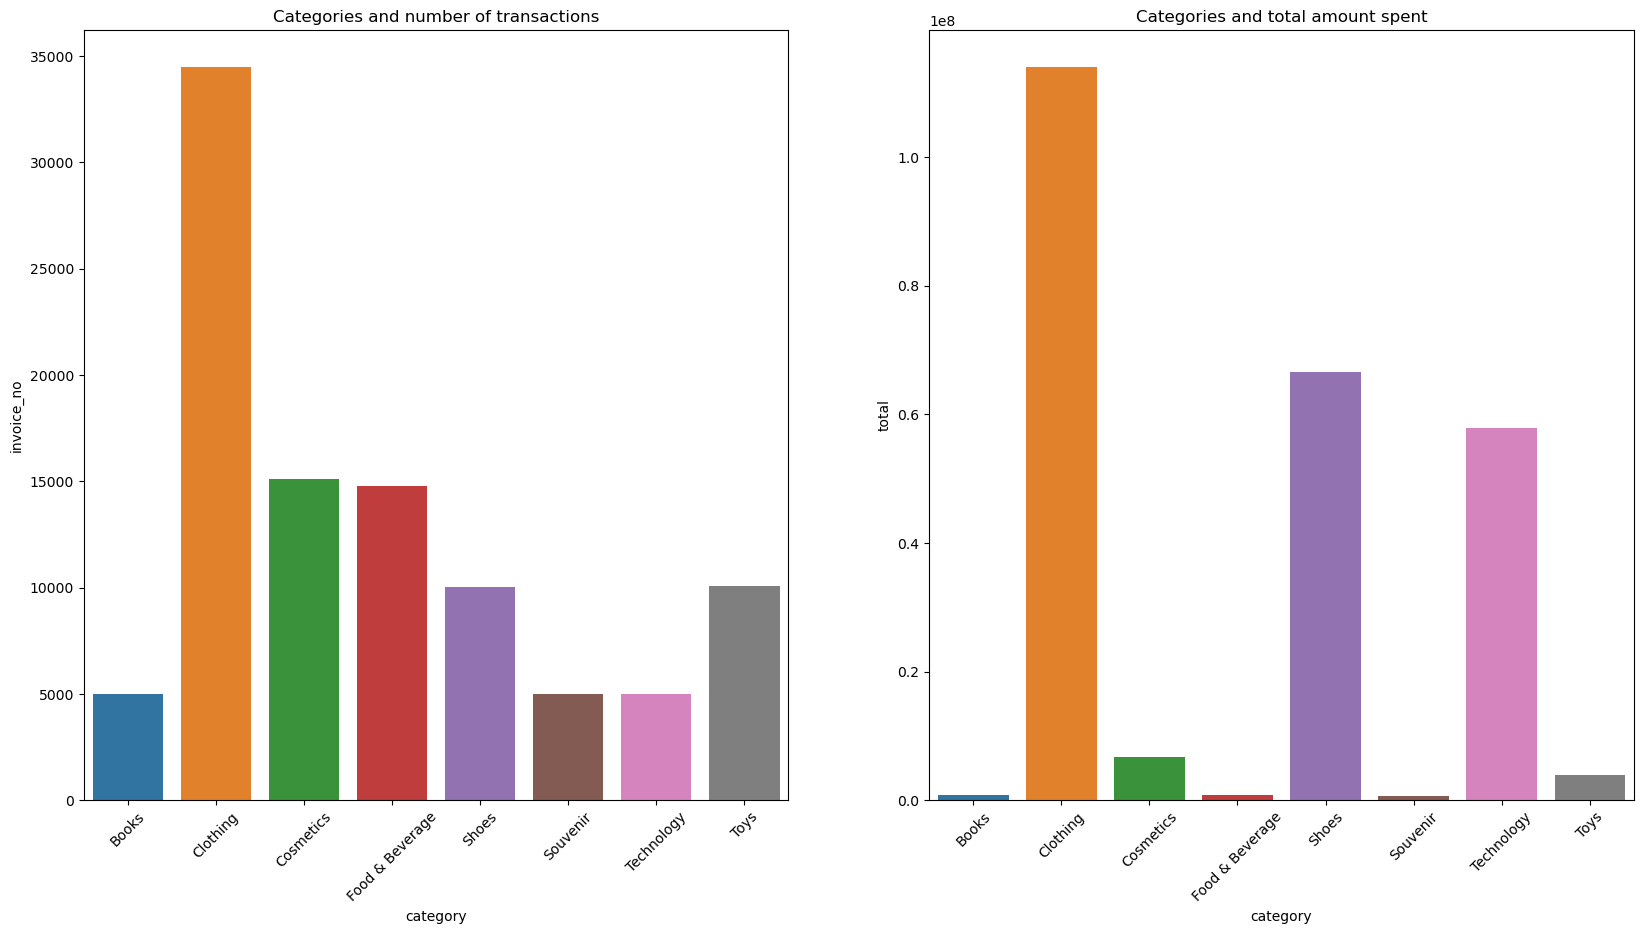

In [26]:
# Visualize popular categories per number of transactions and total amount spent
df_category_total = df.groupby('category')['total'].sum().reset_index()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
sns.barplot(data=df_category_count, x='category', y='invoice_no', ax = ax1).set(title='Categories and number of transactions')
sns.barplot(data=df_category_total, x='category', y = 'total', ax = ax2).set(title='Categories and total amount spent')
ax1.tick_params('x', labelrotation=45)
ax2.tick_params('x', labelrotation=45)

In [53]:
# What is the average price per category?
avg_price_category = pd.DataFrame(df.groupby('category')['price'].mean().sort_values(ascending=False))
avg_price_category.columns = ['average_price']
avg_price_category

KeyError: 'Column not found: price'

##### RECOMENTATION SYSTEM

> To achieve this goal, I am developing a recommendation system using an Amazon dataset encompassing 1462 rows, with key columns including 'product_name', 'category', 'discounted_price', 'actual_price', among others. Leveraging this dataset, I will build a tailored recommendation engine capable of suggesting products based on a user's browsing history and preferences. This means that upon logging in, users will receive personalized product recommendations, enhancing their shopping experience by introducing them to new and relevant items. This personalized approach aims to make their shopping journey more enjoyable and convenient.

###### 1. USER-BASED 

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['user_id_encoded'] = le.fit_transform(df['user_id'])

# Create a new dataframe with the user_id frequency table
freq_table = pd.DataFrame({'User ID': df['user_id_encoded'].value_counts().index, 'Frequency': df['user_id_encoded'].value_counts().values})

# Display the dataframe
print(freq_table)
id_example = freq_table.iloc[0,0]
print(id_example)

> Converting strings to numbers is a fundamental step in data analysis and machine learning. This transformation is essential for many algorithms that require numeric input to function effectively. It ensures that the algorithm can process the data accurately. Additionally, numerical data offers advantages over strings, enabling mathematical operations for calculations like averages and statistics. In the context of recommendation systems, converting user IDs from strings to numbers streamlines the computation of similarity scores between users or items, enhancing the system's efficiency and accuracy. In summary, this conversion is a crucial and beneficial practice, especially in elevating the performance of recommendation systems within the realm of data analysis and machine learning.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def recommend_products(df, user_id_encoded):
    # Use TfidfVectorizer to transform the product descriptions into numerical feature vectors
    tfidf = TfidfVectorizer(stop_words='english')
    df['about_product'] = df['about_product'].fillna('')  # fill NaN values with empty string
    tfidf_matrix = tfidf.fit_transform(df['about_product'])

    # Get the purchase history for the user
    user_history = df[df['user_id_encoded'] == user_id_encoded]

    # Use cosine_similarity to calculate the similarity between each pair of product descriptions
    # only for the products that the user has already purchased
    indices = user_history.index.tolist()

    if indices:
        # Create a new similarity matrix with only the rows and columns for the purchased products
        cosine_sim_user = cosine_similarity(tfidf_matrix[indices], tfidf_matrix)

        # Create a pandas Series with product indices as the index and product names as the values
        products = df.iloc[indices]['product_name']
        indices = pd.Series(products.index, index=products)

        # Get the indices and similarity scores of products similar to the ones the user has already purchased
        similarity_scores = list(enumerate(cosine_sim_user[-1]))
        similarity_scores = [(i, score) for (i, score) in similarity_scores if i not in indices]

        # Sort the similarity scores in descending order
        similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

        # Get the indices of the top 5 most similar products
        top_products = [i[0] for i in similarity_scores[1:6]]

        # Get the names of the top 5 most similar products
        recommended_products = df.iloc[top_products]['product_name'].tolist()

        # Get the reasons for the recommendation
        score = [similarity_scores[i][1] for i in range(5)]

        # Create a DataFrame with the results
        results_df = pd.DataFrame({'Id Encoded': [user_id_encoded] * 5,
                                   'recommended product': recommended_products,
                                   'score recommendation': score})

        return results_df

    else:
        print("No purchase history found.")
        return None

In [ ]:
recommend_products(df, 57)

In [ ]:
recommend_products(df, 1)

#  (!) INLCUDE COMENT 

   ###### 2. CONTENT-BASED

In [ ]:
# Print plot overviews of the first 10 review content.
df['review_content'].head(10)

In [ ]:
# Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words = 'english')

# Replace NaN with an empty string
df['review_content'] = df['review_content'].fillna('')

# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['review_content'])

# Output the shape of tfidf_matrix
tfidf_matrix.shape

> Array mapping from feature integer indices to feature name.

In [ ]:
tfidf.get_feature_names_out()[5000:5010]

> From the above output, you observe that 13826 different vocabularies or words in your dataset have 1462 review.

In [ ]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix[:10000], tfidf_matrix[:10000])

In [ ]:
cosine_sim.shape

In [ ]:
cosine_sim[1]

##### CALCULATE PRODUCT SIMILARITY

In [ ]:
# Combine 'product_name' and 'review_content' into a single text column
df['text'] = df['product_name'] + ' ' + df['review_content']

In [ ]:
# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer()

In [ ]:
# Apply TF-IDF vectorization to 'text' column
tfidf_matrix = vectorizer.fit_transform(df['text'])

##### GET PRODUCT RECOMMENDATIONS

In [ ]:
def get_product_recommendations(product_id, num_recommendations=5):
    # Get the index of the product with the given ID
    index = df[df['product_id'] == product_id].index[0]

    # Get the pairwise similarity scores of the product
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the products based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top N similar products
    top_products = [df.iloc[score[0]] for score in sim_scores[1:num_recommendations+1]]

    return top_products

> Now we can replace 'product_id' with any product id

In [ ]:
product_id = 'B08CF3B7N1'  
recommendations = get_product_recommendations(product_id)
print(recommendations)

#  (!) INLCUDE COMENT 

-----

**QUESTION 2**

Perform Market Basket Analysis on the chosen dataset by using Apriori and FP growth algorithms. Can
you express major divergence between these models? Compare and contrast the machine learning results
obtained based on both algorithms.

> **Market basket analysis** - consider products that are frequently reviewed together as being bought together

In [ ]:
df = pd.read_csv('amazon.csv')
df.head()

# produto x categoria
# categoria x produto

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
df.head()

In [ ]:
teste = pd.DataFrame(df[['user_id']].value_counts(), columns=['values'])
teste

In [ ]:
# Create a basket for each user
basket = (df.groupby(['user_id', 'product_id'])['rating_count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('user_id'))

print(basket)

In [ ]:
# Create and declare a method named as 'encode_units()'
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

basket_sets

# Apriori Rule for Market Basket Analysis

In [ ]:
frequent_itemsets = apriori(basket_sets, min_support = 0.02, use_colnames = True)

In [ ]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 5)
rules.head()

# FP-growth algorithm for Market Basket Analysis

In [ ]:
# Evaluate the frequent item rules for fpgrowth function
frequent_itemsets_fp1 = fpgrowth(basket_sets, min_support = 0.1, use_colnames = True)

print(frequent_itemsets_fp1)

In [ ]:
# Apriori algorithm
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

# Print frequent itemsets for inspection
print("Frequent Itemsets:")
print(frequent_itemsets)

# Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Print rules for inspection
print("\nAssociation Rules:")
print(rules)


<a id="1"></a>
# <p style="padding:10px;background-color:#257CCB;margin:0;color:white;font-family:arial;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">_DATA VISUALISATION_</p>

**QUESTION 3**

Create an interactive Dashboard aimed at older adults (65+) with specific features to summarise the most
important aspects of the data and identify through your visualisation why this dataset is suitable for
Machine Learning models in an online retail business. Explain how your dashboard is designed with this
demographic in mind.

https://www.bing.com/images/search?q=python+dashboard&form=HDRSC3&first=1&cw=1177&ch=689

In [ ]:
pip install pandas plotly

In [ ]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv('amazon.csv')

# Visualization 1: Bar chart for product categories
category_counts = df['category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

fig1 = px.bar(category_counts, x='Category', y='Count', title='Product Categories Distribution')
fig1.show()

# Visualization 2: Line chart for sales trends
sales_trends = df.groupby('product_name')['rating_count'].sum().reset_index().sort_values(by='rating_count', ascending=False)[:10]

fig2 = px.line(sales_trends, x='product_name', y='rating_count', title='Top 10 Products by Rating Count')
fig2.show()

# Visualization 3: Pie chart for product ratings distribution
rating_distribution = df['rating'].value_counts().reset_index()
rating_distribution.columns = ['Rating', 'Count']

fig3 = px.pie(rating_distribution, values='Count', names='Rating', title='Product Ratings Distribution')
fig3.show()


In [ ]:
# Replace 'your_data.csv' with the actual file path or URL of your Amazon dataset
amazon_data = pd.read_csv('amazon.csv')

# Perform any necessary data preprocessing
# For example, aggregate sales data by month
discount_data = amazon_data.groupby('category')['discount_percentage'].sum().reset_index()

In [ ]:
import pandas as pd
import plotly.express as px
from jupyter_dash import JupyterDash
from dash import dcc, html

In [ ]:
# Initialize the dashboard app
app = JupyterDash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Amazon Online Retail Dashboard"),
    
    # Sales Trends Line Chart
    dcc.Graph(
        id='sales-trends',
        figure=px.line(discount_data, x='category', y='discount_percentage', title='Monthly Sales Trends')
    ),

    # Product Category Pie Chart
    dcc.Graph(
        id='product-categories',
        figure=px.pie(amazon_data, names='product_id', title='Product Category Distribution')
    ),

    # Customer Reviews Sentiment Heatmap
    # (Note: This is a simplified example, and sentiment analysis requires additional processing)
    dcc.Graph(
        id='sentiment-heatmap',
        figure=px.imshow([[0.8, 0.2], [0.4, 0.6]], color_continuous_scale='Viridis', title='Customer Reviews Sentiment')
    )
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<a id="1"></a>
# <p style="padding:10px;background-color:#257CCB;margin:0;color:white;font-family:arial;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">_TITLE HERE_</p>

<a id="1"></a>
# <p style="padding:10px;background-color:#257CCB;margin:0;color:white;font-family:arial;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">_REFERENCES_</p>

(22/10)
 
https://stackoverflow.com/questions/14088687/how-to-change-plot-background-color
    
https://datascientyst.com/full-list-named-colors-pandas-python-matplotlib/

https://htmlcolorcodes.com/

Amazon Customer Reviews (dataset) https://www.tensorflow.org/datasets/catalog/amazon_us_reviews

https://github.com/tensorflow/datasets/blob/master/tensorflow_datasets/datasets/amazon_us_reviews/dummy_data/test.tsv

References:

Linden, G., Smith, B., & York, J. (2003). Amazon.com recommendations: Item-to-item collaborative filtering. IEEE Internet Computing, 7(1), 76-80.

Yin, D., Hong, L., Davison, B. D., & Sidiropoulos, N. (2012). Comparative recommendation: A study of effectiveness metrics. In Proceedings of the 35th international ACM SIGIR conference on Research and development in information retrieval (pp. 339-348).

McFee, B., Lanckriet, G. R., & Lanckriet, G. R. (2012). Metric learning to rank. In Advances in neural information processing systems (pp. 2573-2581).

Kang, J., McAuley, J., & Leskovec, J. (2012). Exploring patterns of activity on e-commerce sites. In Proceedings of the 21st international conference on World Wide Web (pp. 795-804).